# KS Statistic

The K-S Statistic, or the Kolmogorov-Smirnov statistic can be used as an evaluation metric for a binary classifier. It helps to understand whether two sets of samples belong to similar probability distribution or not, hence measures the degree of separability between two classes in the dataset. 

If the model is not able to distinguish between the positive class and the negative class, the rate of True Positives and True Negatives will be low, and the KS Statistic would be closer to 0. A high KS Statistic is indicative of a model that predicts the classes more accurately.

In [5]:
import matplotlib
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer as load_data, make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn_evaluation.plot import ks_statistic

In [6]:
matplotlib.rcParams["figure.figsize"] = (7, 7)
matplotlib.rcParams["font.size"] = 18

In [10]:
X, y = load_data(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Create classifier instance
lr = LogisticRegression(max_iter=2000)

# Fit the model
lr.fit(X_train,y_train)
y_probas = lr.predict_proba(X_test)

In the below plot the high KS Statistic value indicates a good separation between the two classes, hence classifier will predict class more accurately.

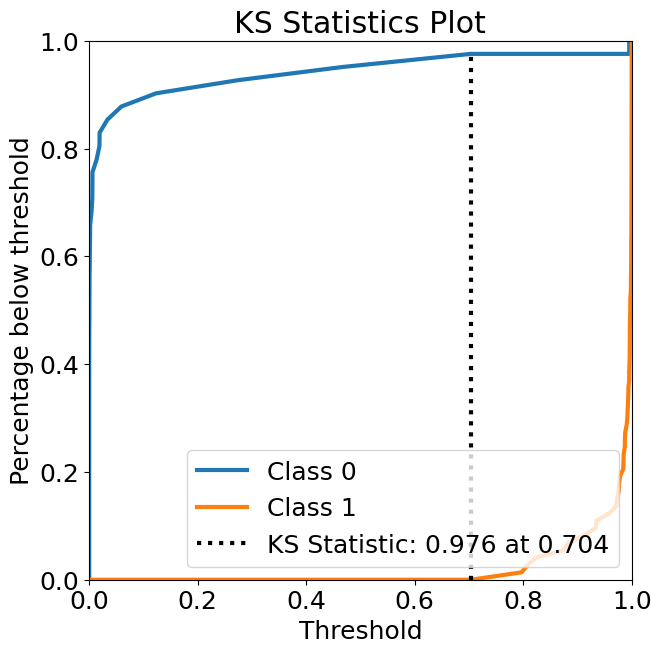

In [11]:
ks_statistic(y_test, y_probas)
plt.show()

In [15]:
# Generate a dataset with low class_sep value
X, y = make_classification(n_samples=1000,
                           n_features=20,
                           n_informative=10,
                           class_sep=0.8,
                           n_classes=2,
                           random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [16]:
model = LogisticRegression(random_state=101)
model = model.fit(X_train, y_train)

In the below plot we can see that since the generated dataset has poor separation among samples of the two classes, the KS Statistic is low , hence the classification task will be harder. 

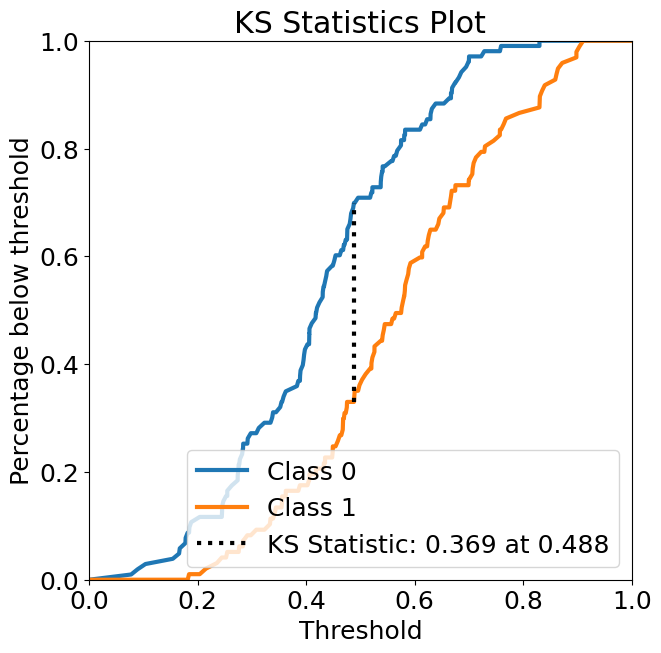

In [17]:
y_probas = model.predict_proba(X_test)
ks_statistic(y_test, y_probas)
plt.show()